In [ ]:
# install needed packages
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

from xgboost import XGBRegressor

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
data = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')

In [ ]:
data

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,40,43,170,75,90.0,1.0,1.0,1.0,1.0,...,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,35,11,180,80,89.0,0.9,1.2,1.0,1.0,...,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,45,41,165,75,91.0,1.2,1.5,1.0,1.0,...,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,55,48,175,80,91.0,1.5,1.2,1.0,1.0,...,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,55,30,165,60,80.0,1.0,1.2,1.0,1.0,...,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,50,48,175,80,92.1,1.5,1.5,1.0,1.0,...,1.0,26.0,36.0,27.0,1.0,0.0,0,26.122449,83.237802,2
999996,1,40,41,170,75,86.0,1.0,1.5,1.0,1.0,...,1.1,14.0,17.0,15.0,1.0,0.0,0,25.951557,77.836416,2
999997,2,45,26,155,50,68.0,1.0,0.7,1.0,1.0,...,0.8,30.0,27.0,17.0,3.0,1.0,0,20.811655,81.542158,2
999998,1,30,29,175,60,72.0,1.5,1.0,1.0,1.0,...,0.8,21.0,14.0,17.0,1.0,0.0,0,19.591837,118.695643,1


In [ ]:
data=data.drop(['sido','height'],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
data.head()

,sex,age,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,40,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,35,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,45,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,55,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,55,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1


In [ ]:
X = data.drop(['stage'],axis=1)

In [ ]:
X

,sex,age,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR
0,1,40,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038
1,1,35,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197
2,1,45,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640
3,1,55,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730
4,1,55,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,50,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,1.0,1.0,26.0,36.0,27.0,1.0,0.0,0,26.122449,83.237802
999996,1,40,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0,25.951557,77.836416
999997,2,45,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,1.0,0.8,30.0,27.0,17.0,3.0,1.0,0,20.811655,81.542158
999998,1,30,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,1.0,0.8,21.0,14.0,17.0,1.0,0.0,0,19.591837,118.695643


In [ ]:
x = pd.DataFrame(X, columns=X.columns)
y = data['stage']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [ ]:
X_train

,sex,age,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR
418842,2,65,65,86.0,1.0,1.2,2.0,1.0,118.0,69.0,...,1.000000,0.7,24.0,20.0,15.0,1.0,1.0,0,28.888889,88.577832
539417,2,40,45,64.0,1.2,1.2,1.0,1.0,110.0,70.0,...,1.000000,0.7,19.0,13.0,14.0,1.0,1.0,0,18.730489,97.299534
522420,2,55,55,76.0,0.6,0.3,1.0,1.0,112.0,74.0,...,1.000000,0.8,14.0,9.0,16.0,1.0,1.0,0,22.892820,78.440153
695033,1,65,70,93.0,1.0,0.9,1.0,1.0,120.0,70.0,...,3.000000,1.2,81.0,133.0,69.0,2.0,0.0,0,25.711662,64.089830
680401,2,75,60,77.0,1.0,1.0,1.0,1.0,102.0,60.0,...,1.000000,0.8,30.0,21.0,14.0,1.0,0.0,0,22.038567,73.828281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564465,2,55,65,82.0,0.5,0.2,1.0,1.0,130.0,80.0,...,1.000000,0.8,25.0,27.0,21.0,1.0,1.0,0,28.888889,78.440153
412925,1,25,65,82.5,1.5,1.5,1.0,1.0,122.0,80.0,...,1.000000,1.0,15.0,16.0,19.0,3.0,1.0,1,23.875115,94.913592
255366,1,65,80,93.0,0.5,0.8,1.0,1.0,100.0,80.0,...,1.000000,0.9,23.0,26.0,22.0,3.0,0.0,0,27.681661,89.324053
759451,1,45,90,97.0,1.2,1.2,1.0,1.0,132.0,84.0,...,1.000000,1.0,17.0,20.0,68.0,3.0,1.0,1,26.296567,84.946236


In [ ]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[20:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Built-in Feature Importance

In [ ]:
xgb.feature_importances_

array([0.0000000e+00, 4.1876207e-03, 0.0000000e+00, 4.7814467e-07,
       0.0000000e+00, 4.1247972e-06, 2.4232110e-04, 5.9679292e-05,
       8.7164692e-05, 6.4752476e-06, 0.0000000e+00, 5.6848421e-06,
       0.0000000e+00, 0.0000000e+00, 3.4159279e-04, 0.0000000e+00,
       2.8100665e-04, 1.8387940e-03, 0.0000000e+00, 6.8589009e-07,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9294430e-01], dtype=float32)

In [ ]:
xgb.importance_type

'gain'

<BarContainer object of 26 artists>

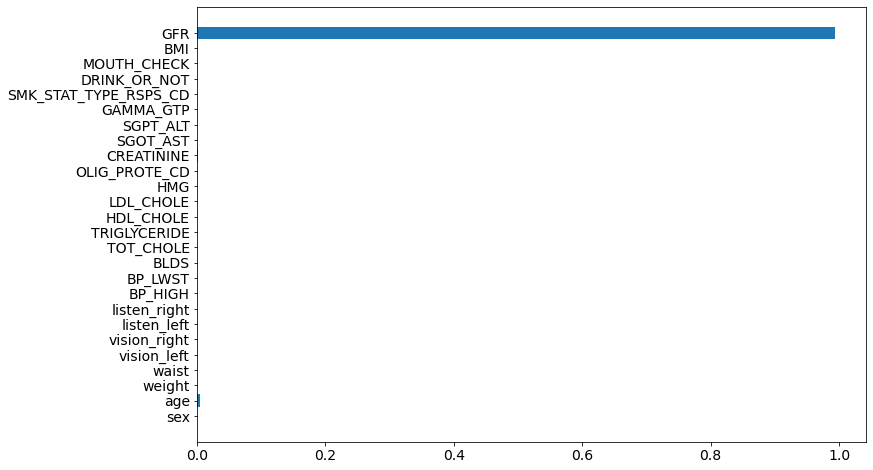

In [ ]:
plt.barh(X.columns, xgb.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

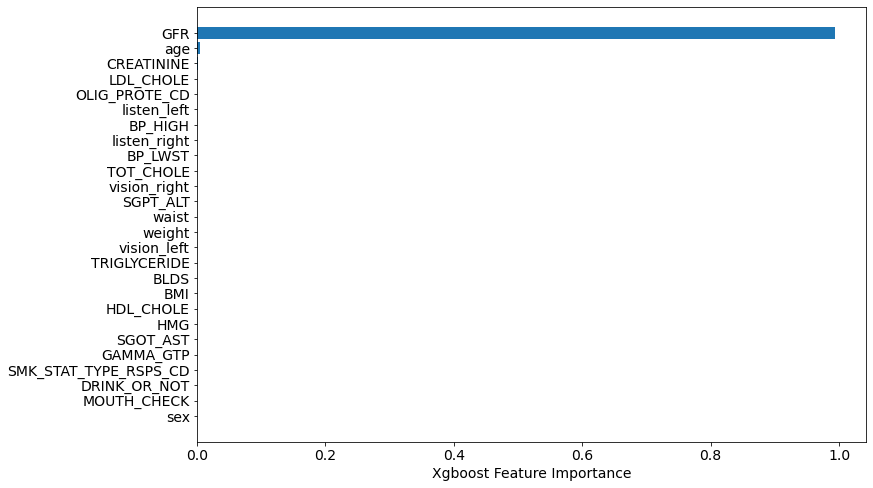

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Permutation based Importance

In [ ]:
perm_importance = permutation_importance(xgb, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

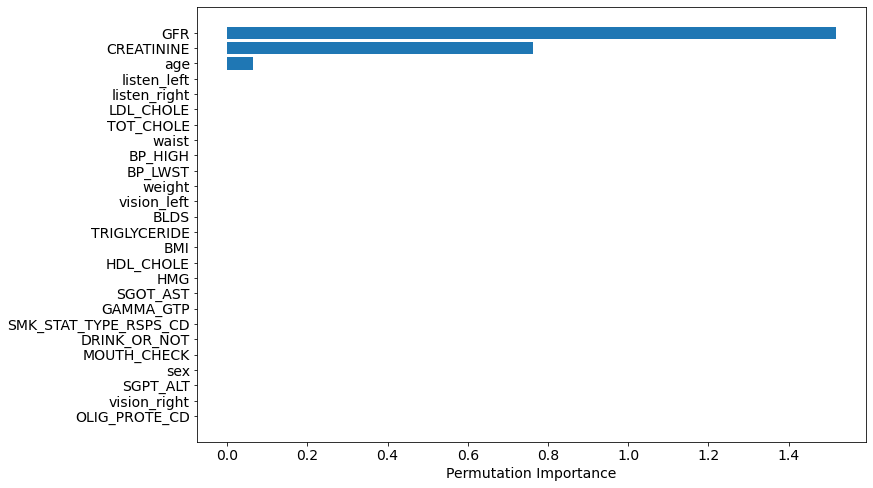

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

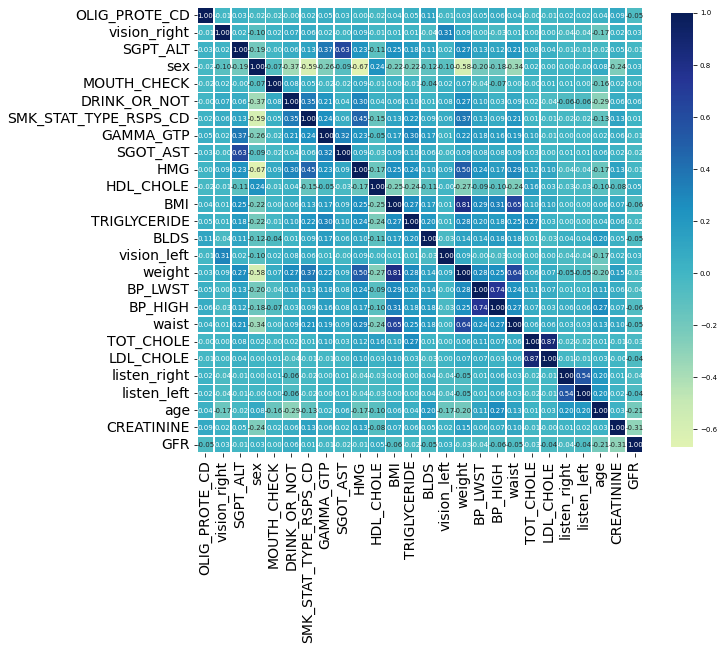

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font_scale=0.85)
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    plt.rcParams.update({'font.size': 7})
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": 0.80}
                )
    plt.show();
    
correlation_heatmap(X_train[X.columns[sorted_idx]])

## SHAP importance

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

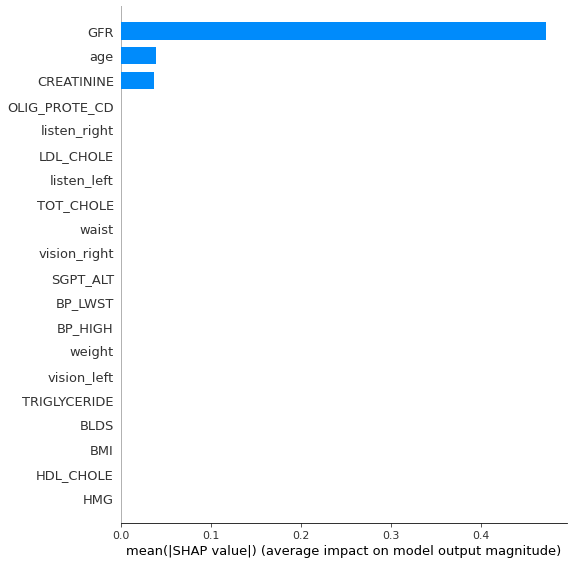

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

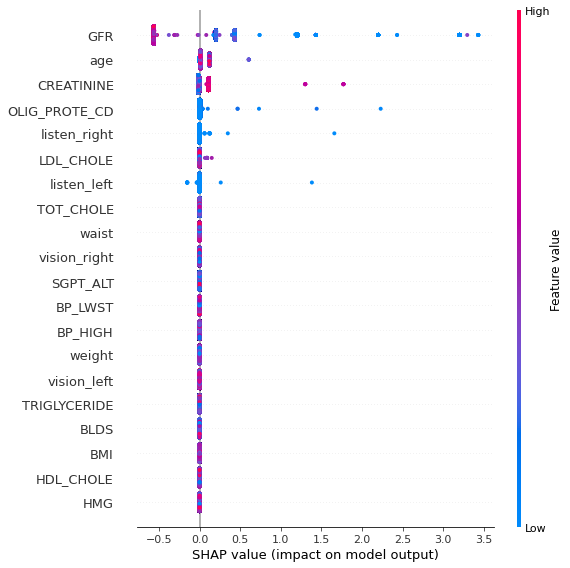

In [ ]:
shap.summary_plot(shap_values, X_train)

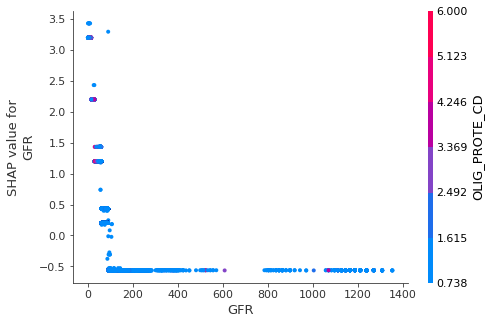

In [ ]:
shap.dependence_plot("GFR", shap_values, X_train)

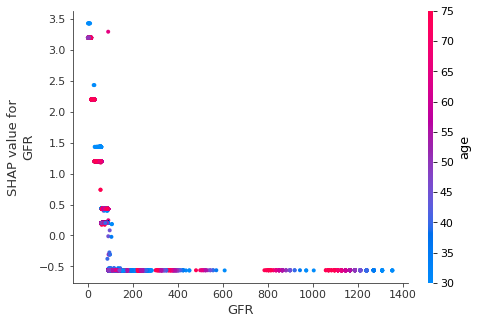

In [ ]:
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="age")

ValueError: ignored

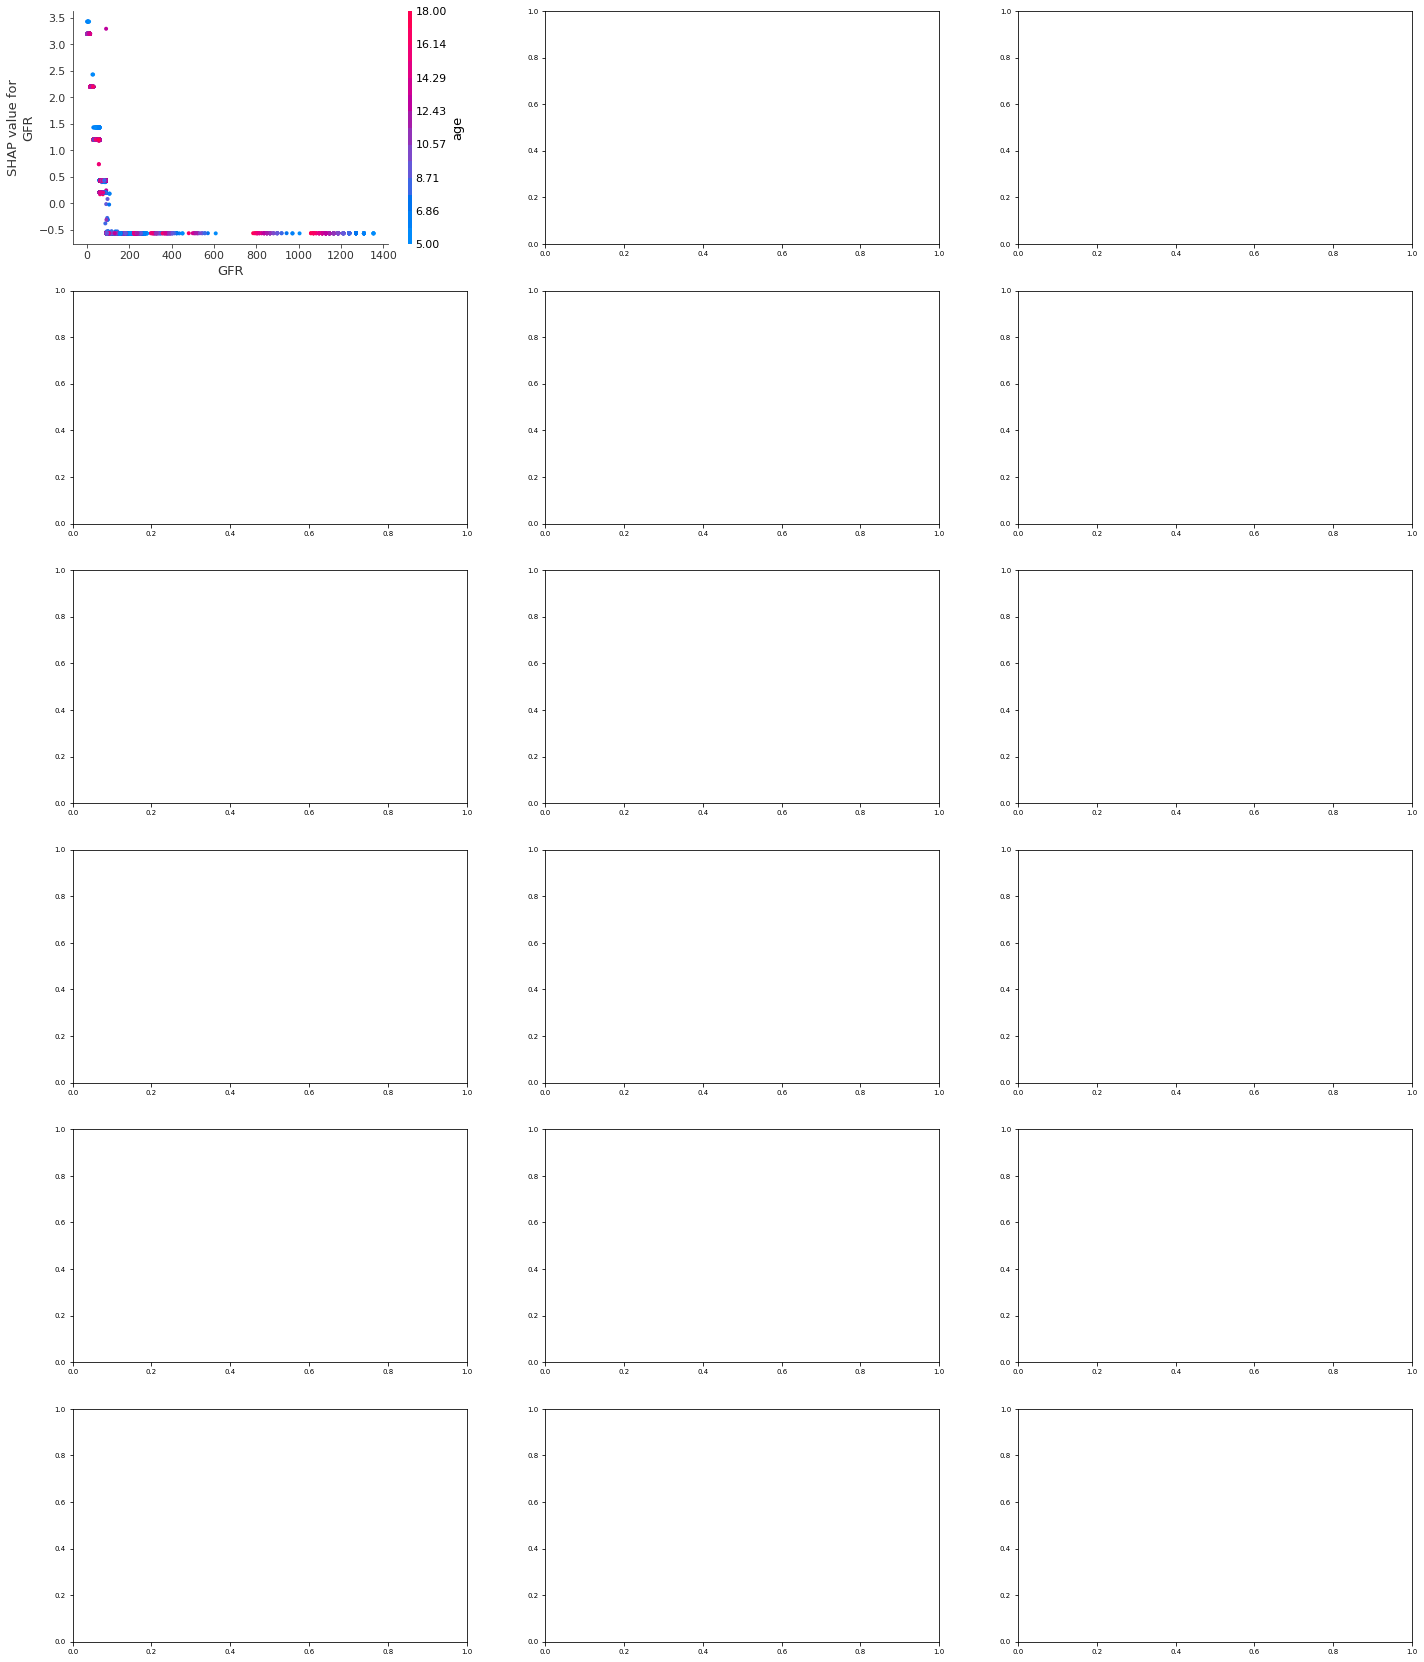

In [53]:
import matplotlib 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(24,30))
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
# matplotlib.rcParams.update({'font.size': 30})
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="age", ax=axes[0,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="BP_HIGH",ax=axes[0,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="BP_LWST",ax=axes[0,2], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="BLDS",ax=axes[1,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="TOT_CHOLE", ax=axes[1,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="TRIGLYCERIDE",ax=axes[1,2], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="HDL_CHOLE",ax=axes[2,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="LDL_CHOLE",ax=axes[2,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="HMG", ax=axes[2,2], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="OLIG_PROTE_CD",ax=axes[3,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="SGOT_AST",ax=axes[3,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="SGPT_ALT",ax=axes[3,2], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="GAMMA_GTP", ax=axes[4,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="SMK_STAT_TYPE_RSPS_CD",ax=axes[4,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="DRINK_OR_NOT",ax=axes[4,2], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="MOUTH_CHECK",ax=axes[5,0], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="BMI",ax=axes[5,1], show=False)
shap.dependence_plot("GFR", shap_values, X_train, interaction_index="CREATININE",ax=axes[5,2], show=False)


